In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
from datetime import date
stk_dataset=yf.download("RELIANCE.NS",start=date(2022,4,1),end=date(2023,4,1))
stk_dataset

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-04-01,1221.528442,1225.805917,1205.959579,1212.398662,7922880
2022-04-04,1225.139038,1230.336364,1214.997433,1221.344543,7929162
2022-04-05,1207.822266,1227.990630,1205.361623,1219.343709,13149870
2022-04-06,1204.602783,1211.708793,1189.907784,1189.907784,12257215
2022-04-07,1183.353638,1198.600596,1180.662941,1193.587216,15496499
...,...,...,...,...,...
2023-03-24,1013.383179,1034.862342,1010.945529,1032.677618,12375945
2023-03-27,1029.135986,1036.701982,1011.957353,1019.914294,14054323


In [4]:
stk_dataset.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,1157.041471,1169.724696,1145.768905,1157.971509,1.421068e+07
std,61.071634,61.694438,59.692060,60.079667,8.048908e+06
min,1012.440308,1021.064175,1002.666595,1018.764485,3.370033e+06
25%,1111.189209,1120.962874,1098.333939,1113.051918,9.434053e+06
50%,1165.484863,1177.351322,1153.526540,1167.324766,1.257582e+07
75%,1199.198486,1211.018884,1186.734056,1198.945389,1.706322e+07
max,1296.958496,1313.654332,1281.435497,1313.654332,8.199715e+07


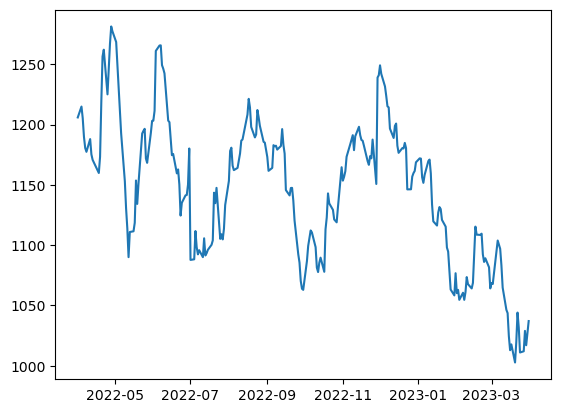

In [5]:
plt.plot(stk_dataset["Low"])

In [6]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(stk_dataset["Low"])

P_value < 0.0.5 reject null and accept alternate hypothesis     H0: Datas are non-stationary
P_value > 0.0.5 accept null and reject alternate hypothesis     H1 : Datas are stationary

In [7]:
Statistic=result[0]
p_value=result[1]
critical_values=result[4]
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if Statistic < critical_values["1%"] or Statistic < critical_values["5%"] or Statistic < critical_values["10%"] or p_value < 0.05:
    print(" Rejecting null and accepting alternate the data are stationary")
else:
    print(" accepting null and rejecting alternate the data are non-stationary")
 
 

p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
 accepting null and rejecting alternate the data are non-stationary


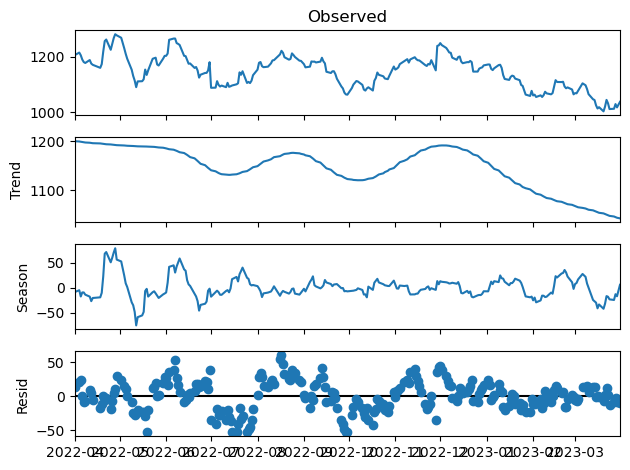

In [8]:
from statsmodels.tsa.seasonal import STL

decomposition = STL(stk_dataset["Low"], period=30).fit()  # Set `period` based on known seasonality
decomposition.plot()
plt.show()

# It is Season and trend non-stationarity

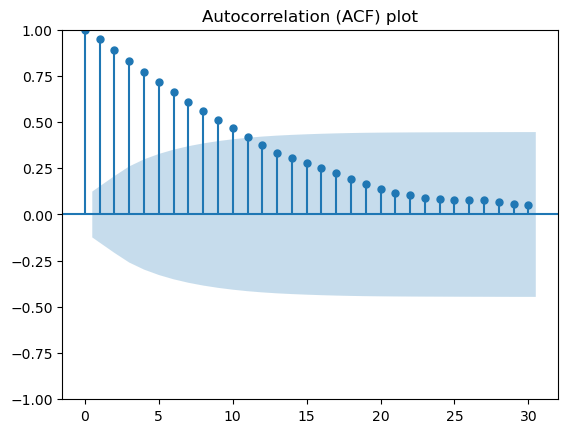

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stk_dataset["Low"],lags=30)
plt.title("Autocorrelation (ACF) plot")
plt.show()

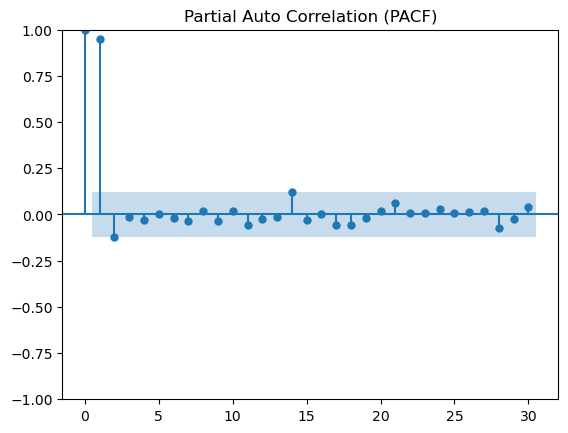

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stk_dataset["Low"],lags=30)
plt.title("Partial Auto Correlation (PACF)")
plt.show()

ACF plot shows that datas are non statinary as it is gradually declining
In PACF the point in blue band are insignificant

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
stan=mms.fit_transform(stk_dataset["Low"])
print("Len",stk_dataset.shape)

Len (249, 5)
